##### [< Forrige](4%20-%20lister%2C%20oppslag%20og%20numpy.ipynb)     |     [Neste >](6%20-%20logikk-filtrering-betingelser.ipynb)

# 5 - Sympy

Sympy er en veldig nyttig pakke innenfor samfunnsøknomi. Med den kan vi regne analytisk, det vil si med symboler. I samfunnsøknomi bruker vi mye matematikk som denne pakken kan hjelpe oss med. Vi starter med et eksempel på utregning av profittmaksimum:

## Beregning av profittmaksimum med sympy

Vi definerer først produktfunksjonen, altså produsert mengde for en gitt mengde arbeidskraft og et produktivitetsparameter a:

In [1]:
def f(L,a):
    return L**a

Vi Definerer så profittfunksjonen, som er avhengig av produktfunksjonen:

In [2]:
def profit(L,a,w,p,K):
    return p*f(L,a)-w*L+K

Vi kan nå plotte profittfunksjonen:

Text(0, 0.5, 'Profitt')

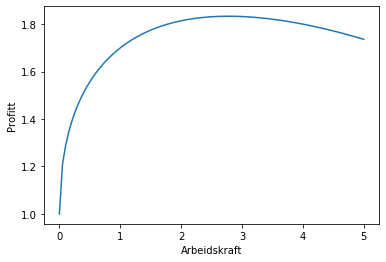

In [3]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,5,100)
plt.plot(x,profit(x,0.5,0.3,1,1))
plt.xlabel('Arbeidskraft')
plt.ylabel('Profitt')

Vi skal nå begynne å bruke sympy. Det første vi må gjøre er å definere hvilke symboler som skal behandles analytisk (altså som symboler og ikke flyttall). Det gjør vi slik:

In [4]:
import sympy as sp
L,a,w,p,K=sp.symbols("L a w p K")

Med symbolene definert, vil nå vår profittfunksjon vises analytisk når vi bruker de definere symbolene:

In [5]:
profit(L,a,w,p,K)

K - L*w + L**a*p

Vi ønsker å finne ut for hvilken arbeidskraft fortjenesten er størst. Det er det høyeste punktet i figuren fra Eksempel ??. På dette punktet har profittfunksjonen ingen stigning, slik at den deriverte er null. For å finne dette punktet må vi først finne den *deriverte*. Det gjør vi i sympy med funksjonen `diff()`. Den tar to argumenter. Det første er funksjonen, det andre er den variabel vi ønsker å derivere med hensyn til. 

Som vi ser av figuren i Eksempel ??, så har vi arbeidskraft `L` langs x-aksen, så det er denne variabelen vi ønsker å derivere med hensyn til. Den deriverte av `profitt()` med hensyn til `L` er dermed:

In [6]:
d_profitt=sp.diff(profit(L,a,w,p,K),L)
d_profitt

-w + L**a*a*p/L

### Løser førsteordensbetingelsen

For å finne punktet der denne deriverte er null, setter vi opp en ligning der den deriverte er null, og løser for den `L` som tilfredstiller ligningen. En slik ligning kalles "førsteordensbetingelse", eller "first order condition" på engelsk. Vi forkorter den derfor til "foc":

In [7]:
foc=sp.Eq(d_profitt,0)
foc

Eq(-w + L**a*a*p/L, 0)

Vi kan nå løse førsteordensbetingelsen med funksjonen `solve`, som ligger i modulen `solvers`i sympy:

In [8]:
from sympy.solvers import solve
L_max=solve(foc,L)[0]
L_max

(a*p/w)**(-1/(a - 1))

Legg merke til at resultatet ligger i en liste med lengde 1, så vi må hente ut element 0 i listen for å vise resultatet. Vi kan finne hva den analytiske verdien er i maksimum ved å sette `L_max`inn i profittfunksjonen:

In [9]:
profit_max=profit(L_max,a,w,p,K)

Vi kan nå beregne de nummeriske verdiene ved å sette inn noen passende tall for de ukjente symbolene. Vi prøver med 0.5 for produktivitet `a`, 0.3 for lønn `w`, 1 for prise `p` og 1 for kapital `K`. Vi forteller sympy om at vi ønsker å bruke dise verdiene ved å lage et oppslag der hvert av symbolene er nøkkel til hver av de nummeriske verdiene:

In [11]:
num_dict={a:0.5,w:0.3,p:1,K:1}

Vi kan nå finne nummerisk hvor mye arbeidskraft som trengs for å oppnå maksimal fortjeneste:

In [12]:
L_max.subs(num_dict)

2.77777777777778

Om vi nå legger dette tallet inn for symbol `L`, kan vi finne hvor stor fortjenesten er i dette punktet: 

In [20]:
num_dict[L]=L_max.subs(num_dict)
num_dict[L]

2.77777777777778

Med det oppdaterte oppslaget blir fortjenesten

In [15]:
profit_max_num=profit(L,a,w,p,K).subs(num_dict)
profit_max_num

1.83333333333333

Med modulene `display`og `Markdown`fra `IPython` (pakken som driver Jupyter), kan vi sette dette in i en pen tabell:

In [21]:
from IPython.display import display, Markdown

tbl=f"""
|                                 | Desimalverdi                             |  Analytisk verdi              | 
| :-------------------------------| :----------------------------------------| :-----------------------------| 
| Optimal mengde arbeidskraft:     | ${np.round(float(num_dict[L]),1)}$         |${sp.latex(L_max)}$            | 
| Maksimal profitt                | ${np.round(float(profit_max_num),1)}$    |${sp.latex(profit_max)}$       | 

"""
display(Markdown(tbl))


|                                 | Desimalverdi                             |  Analytisk verdi              | 
| :-------------------------------| :----------------------------------------| :-----------------------------| 
| Optimal mengde arbeidskraft:     | $2.8$         |$\left(\frac{a p}{w}\right)^{- \frac{1}{a - 1}}$            | 
| Maksimal profitt                | $1.8$    |$K + p \left(\left(\frac{a p}{w}\right)^{- \frac{1}{a - 1}}\right)^{a} - w \left(\frac{a p}{w}\right)^{- \frac{1}{a - 1}}$       | 



La oss nå plotte løstningen. Vi plotter her følgende, i rekkefølge:
1. Den opprinnelige profittfunksjonen
2. Den horisontale tangenten som tangerer i maksimumspunktet
3. En vertikal linje som viser mengden arbeidskraft i optimum. 

Text(0, 0.5, 'Profitt')

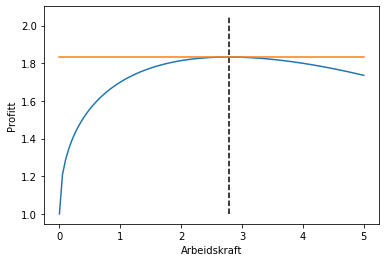

In [22]:
plt.plot(x,profit(x,0.5,0.3,1,1))
plt.plot(x,profit_max_num*np.ones(len(x)))
plt.vlines(float(num_dict[L]), 1.0, 2.05,colors=['black'],linestyles='dashed')

#Axis lables:
plt.xlabel('Arbeidskraft')
plt.ylabel('Profitt')

##### [< Forrige](4%20-%20lister%2C%20oppslag%20og%20numpy.ipynb)     |     [Neste >](6%20-%20logikk-filtrering-betingelser.ipynb)